이상치
- 정상 범주에서 크게 벗어난 값, (극단치라고도 함)
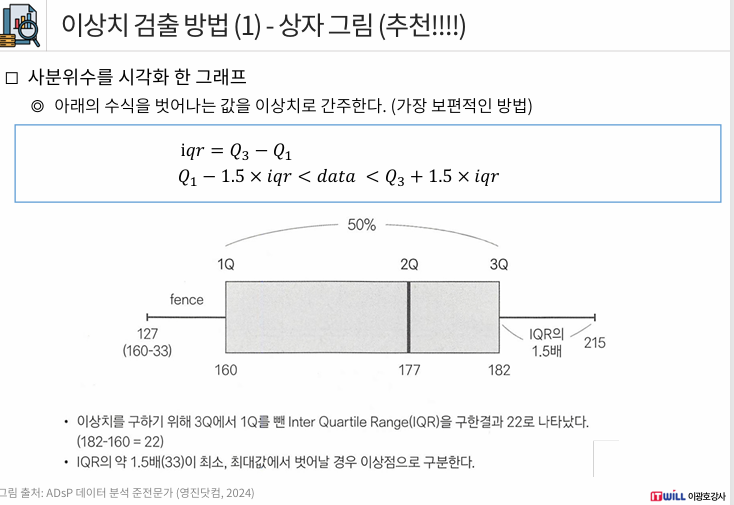

In [2]:
import numpy as np
from hossam import load_data
from pandas import DataFrame
from sklearn.impute import SimpleImputer
from matplotlib import pyplot as plt

In [3]:
origin = load_data("ref_sample")
origin

[data] https://data.hossam.kr/data/lab03/ref_sample.xlsx
[desc] 데이터 정제를 위한 실습용 데이터
[!] Cannot read metadata


,kor,eng,math,sic
name,,,,
철수,98.0,77,88.0,64.0
영희,88.0,120,62.0,72.0
민철,NaN,70,83.0,79.0
수현,63.0,60,31.0,71.0
호영,75.0,50,90.0,NaN
영호,80.0,88,91.0,72.0
용식,82.0,88,NaN,90.0
나영,90.0,92,81.0,NaN
석영,91.0,90,89.0,80.0


In [4]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imr = imr.fit_transform(origin.values)
re_df = DataFrame(df_imr, index=origin.index, columns=origin.columns)
re_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.0,88.000,64.000000
영희,88.000,120.0,62.000,72.000000
민철,83.375,70.0,83.000,79.000000
수현,63.000,60.0,31.000,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,90.000000
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


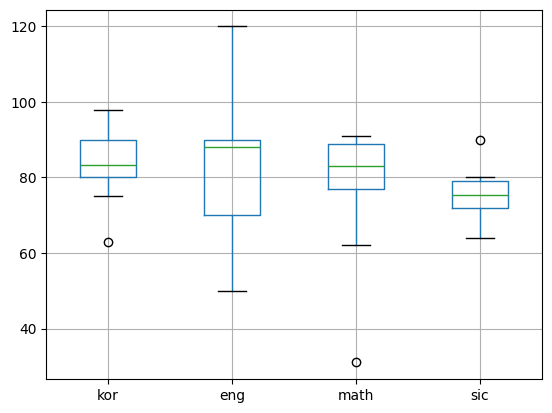

In [5]:
re_df.boxplot()
plt.show()

In [6]:
re_df.loc[re_df['eng']>100,'eng']=np.nan
re_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.0,88.000,64.000000
영희,88.000,NaN,62.000,72.000000
민철,83.375,70.0,83.000,79.000000
수현,63.000,60.0,31.000,71.000000
호영,75.000,50.0,90.000,75.428571
영호,80.000,88.0,91.000,72.000000
용식,82.000,88.0,76.875,90.000000
나영,90.000,92.0,81.000,75.428571
석영,91.000,90.0,89.000,80.000000


In [7]:
imr = SimpleImputer(missing_values = np.nan, strategy="mean")
df_imr = imr.fit_transform(re_df.values)
outline_df = DataFrame(df_imr, index=re_df.index, columns=re_df.columns)
outline_df

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,63.000,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


In [8]:
outline_df2 = outline_df.copy()
국어Q1=outline_df2['kor'].quantile(0.25)
국어Q3 = outline_df2['kor'].quantile(0.75)
국어iqr = 국어Q3 - 국어Q1
print("국어 점수의 사분위간 범위:", 국어iqr)

국어 점수의 사분위간 범위: 10.0


In [9]:
outline_max = 국어Q3 + 국어iqr * 1.5
outline_min = 국어Q1 - 국어iqr * 1.5
print("상한 극단치 경계:", outline_max)
print("하한 극단치 경계:", outline_min)

상한 극단치 경계: 105.0
하한 극단치 경계: 65.0


In [10]:
outline_df2.loc[outline_df2['kor']<outline_min, 'kor']


name
수현    63.0
Name: kor, dtype: float64

In [11]:
outline_df2.loc[outline_df['kor']<outline_min,'kor']=np.nan
outline_df2

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


In [12]:
outline_df2.loc[outline_df2['kor']>outline_max,'kor']=np.nan
outline_df2

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,31.000,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


In [13]:
수학Q1 = outline_df2['math'].quantile(0.25)
수학Q3 = outline_df2['math'].quantile(0.75)
수학iqr = 수학Q3 - 수학Q1
outline_max = 수학Q3 + 수학iqr * 1.5
outline_min = 수학Q1 - 수학iqr * 1.5

outline_df2.loc[outline_df2['math']<outline_min,'math']=np.nan
outline_df2.loc[outline_df2['math']>outline_max,'math']=np.nan
outline_df2


,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,NaN,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,90.000000
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


In [14]:
과학Q1 = outline_df2['sic'].quantile(0.25)
과학Q3 = outline_df2['sic'].quantile(0.75)
과학iqr = 과학Q3 - 과학Q1
outline_max = 과학Q3 + 과학iqr * 1.5
outline_min = 과학Q1 - 과학iqr * 1.5
outline_df2.loc[outline_df2['sic']<outline_min,'sic']=np.nan
outline_df2.loc[outline_df2['sic']>outline_max,'sic']=np.nan
outline_df2

,kor,eng,math,sic
name,,,,
철수,98.000,77.000,88.000,64.000000
영희,88.000,76.875,62.000,72.000000
민철,83.375,70.000,83.000,79.000000
수현,NaN,60.000,NaN,71.000000
호영,75.000,50.000,90.000,75.428571
영호,80.000,88.000,91.000,72.000000
용식,82.000,88.000,76.875,NaN
나영,90.000,92.000,81.000,75.428571
석영,91.000,90.000,89.000,80.000000


In [15]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imr = imr.fit_transform(outline_df2.values)
final_df = DataFrame(df_imr, index=outline_df2.index,
                    columns=outline_df2.columns)
final_df

,kor,eng,math,sic
name,,,,
철수,98.000000,77.000,88.000000,64.000000
영희,88.000000,76.875,62.000000,72.000000
민철,83.375000,70.000,83.000000,79.000000
수현,85.921875,60.000,82.609375,71.000000
호영,75.000000,50.000,90.000000,75.428571
영호,80.000000,88.000,91.000000,72.000000
용식,82.000000,88.000,76.875000,73.607143
나영,90.000000,92.000,81.000000,75.428571
석영,91.000000,90.000,89.000000,80.000000


연습문제 - 신비한 식물 성장 기록 연구

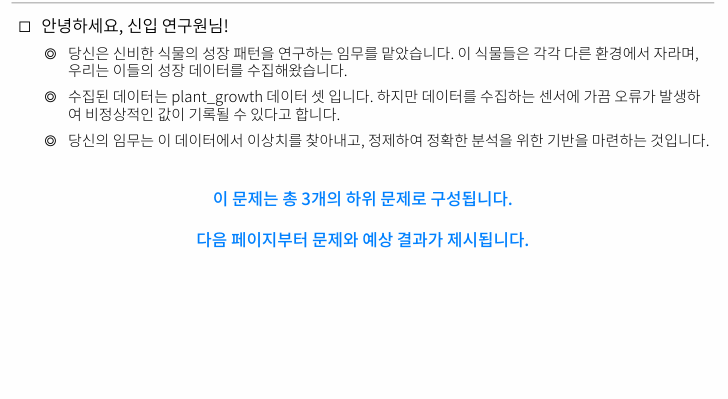

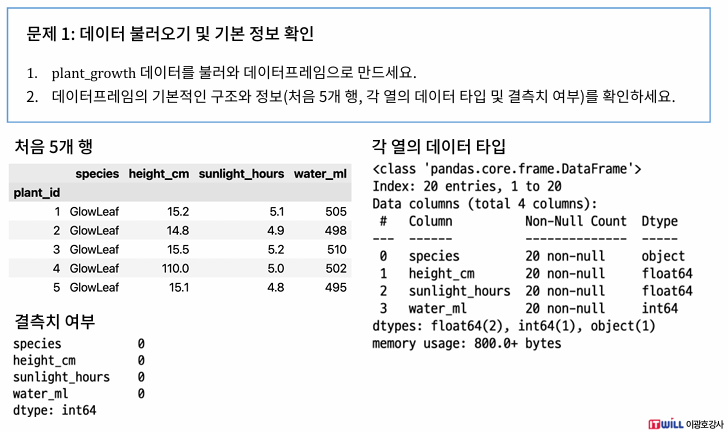

In [17]:
origin = load_data("plant_growth")
origin.head()

[data] https://data.hossam.kr/data/lab03/plant_growth.xlsx
[desc] 신비한 식물의 성장 기록 데이터

field           description
--------------  ----------------------------------------
plant_id        식물의 고유 ID
species         식물의 종 (GlowLeaf, SunPetal, AquaRoot)
height_cm       식물의 키 (cm)
sunlight_hours  일일 평균 햇빛 노출 시간
water_ml        일일 평균 물 공급량 (ml)



,species,height_cm,sunlight_hours,water_ml
plant_id,,,,
1,GlowLeaf,15.2,5.1,505
2,GlowLeaf,14.8,4.9,498
3,GlowLeaf,15.5,5.2,510
4,GlowLeaf,110.0,5.0,502
5,GlowLeaf,15.1,4.8,495


In [19]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 1 to 20
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   species         20 non-null     object 
 1   height_cm       20 non-null     float64
 2   sunlight_hours  20 non-null     float64
 3   water_ml        20 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 800.0+ bytes


In [20]:
origin.isna().sum()

species           0
height_cm         0
sunlight_hours    0
water_ml          0
dtype: int64

In [23]:
origin.value_counts()

species   height_cm  sunlight_hours  water_ml
AquaRoot  8.1         2.4            975         1
          8.2         2.1            950         1
          8.3         2.0            945         1
          8.4        -1.0            955         1
          8.5         2.2            960         1
          8.6         2.3            970         1
GlowLeaf  14.8        4.9            498         1
          14.9        5.3            512         1
          15.1        4.8            495         1
          15.2        5.1            505         1
          15.3        5.1            508         1
          15.5        5.2            510         1
          110.0       5.0            502         1
SunPetal  24.8        7.9            695         1
          24.9        8.1            698         1
          25.0        8.4            715         1
          25.1        8.0            702         1
          25.3        8.2            705         1
          25.4        25.0          

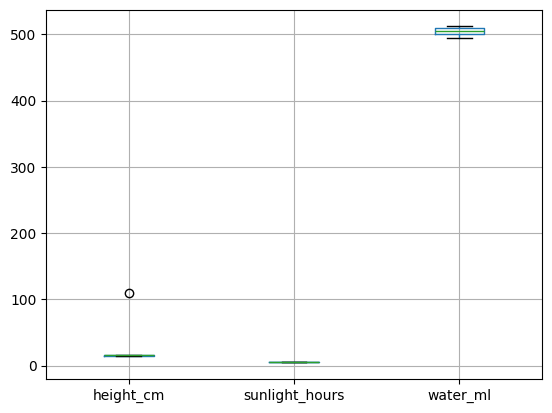

In [22]:
df1 = origin[origin['species'] == 'GlowLeaf']
df1.boxplot()
plt.show()

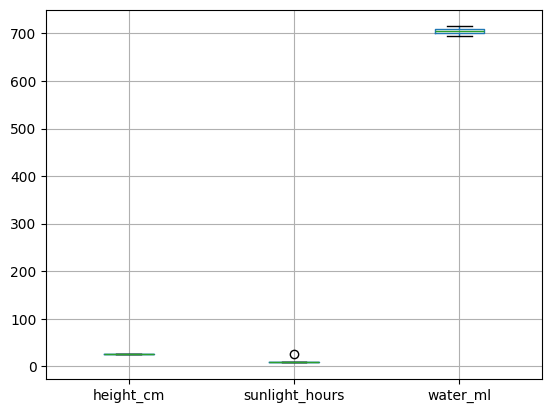

In [24]:
df1 = origin[origin['species'] == 'SunPetal']
df1.boxplot()
plt.show()

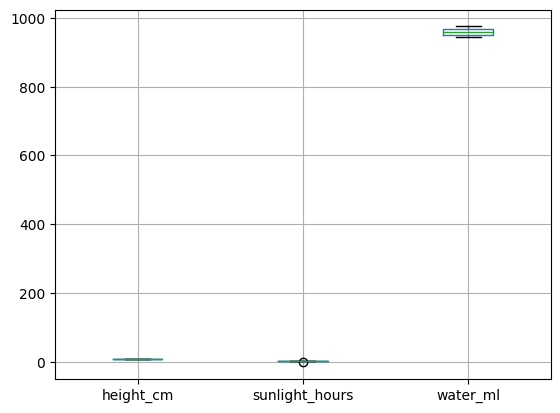

In [25]:
df1 = origin[origin['species'] == 'AquaRoot']
df1.boxplot()
plt.show()

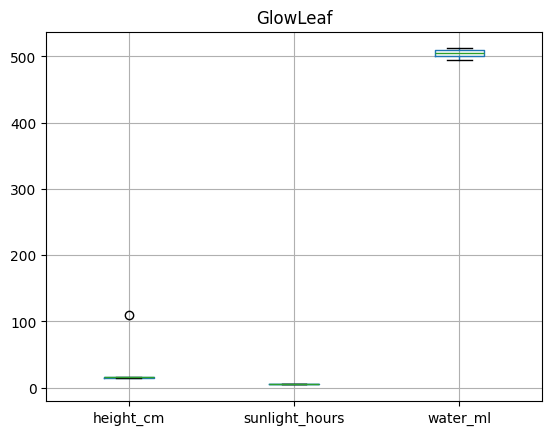

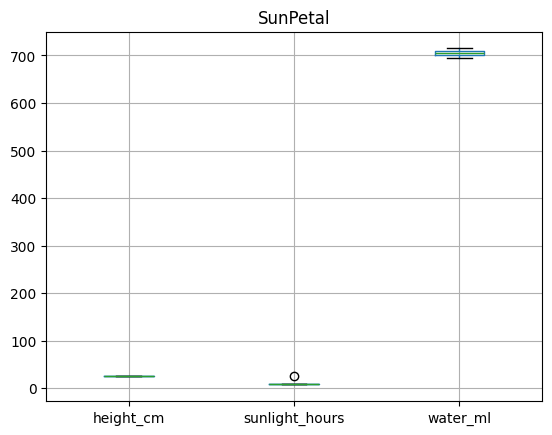

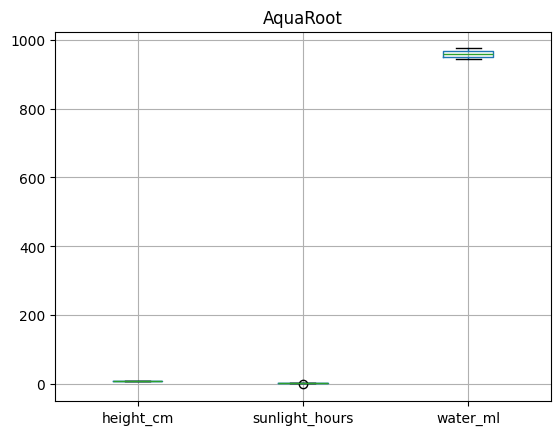

In [26]:
s = origin['species'].value_counts()
for i in s.index:
    df1 = origin[origin['species'] == i]
    df1.boxplot()
    plt.title(i)
    plt.show()

In [27]:
df2 = origin.drop(columns=['species'])
df2

,height_cm,sunlight_hours,water_ml
plant_id,,,
1,15.2,5.1,505
2,14.8,4.9,498
3,15.5,5.2,510
4,110.0,5.0,502
5,15.1,4.8,495
6,25.3,8.2,705
7,24.9,8.1,698
8,25.5,8.3,710
9,25.1,8.0,702


In [28]:
height_cm_q1 = df2['height_cm'].quantile(0.25)
height_cm_q3 = df2['height_cm'].quantile(0.75)
height_cm_iqr = height_cm_q3 - height_cm_q1

outline_max = height_cm_q3 + height_cm_iqr * 1.5
outline_min = height_cm_q1 - height_cm_iqr * 1.5

print("height_cm에 대한 iqr : %.2f, 하한 이상치 경계: %.2f, 상한 이상치 경계: %.2f" % (height_cm_iqr, outline_min, outline_max))

height_cm에 대한 iqr : 16.45, 하한 이상치 경계: -16.10, 상한 이상치 경계: 49.70


In [30]:
df2.loc[(df2['height_cm'] > outline_max) | (df2['height_cm'] < outline_min)]

,height_cm,sunlight_hours,water_ml
plant_id,,,
4,110.0,5.0,502


In [31]:
sunlight_hours_q1 = df2['sunlight_hours'].quantile(0.25)
sunlight_hours_q3 = df2['sunlight_hours'].quantile(0.75)
sunlight_hours_iqr = sunlight_hours_q3 - sunlight_hours_q1

outline_max = sunlight_hours_q3 + sunlight_hours_iqr * 1.5
outline_min = sunlight_hours_q1 - sunlight_hours_iqr * 1.5

print("sunlight_hours에 대한 iqr : %.2f, 하한 이상치 경계: %.2f, 상한 이상치 경계: %.2f" % (sunlight_hours_iqr, outline_min, outline_max))

sunlight_hours에 대한 iqr : 5.65, 하한 이상치 경계: -6.10, 상한 이상치 경계: 16.50


In [32]:
df3 = df2.copy()

outline_max = height_cm_q3 + height_cm_iqr * 1.5
outline_min = height_cm_q1 - height_cm_iqr * 1.5
df3.loc[(df3['height_cm'] > outline_max) | (df3['height_cm'] < outline_min), 'height_cm'] = np.nan

outline_max = sunlight_hours_q3 + sunlight_hours_iqr * 1.5
outline_min = sunlight_hours_q1 - sunlight_hours_iqr * 1.5
df3.loc[(df3['sunlight_hours'] > outline_max) | (df3['sunlight_hours'] < outline_min), 'sunlight_hours'] = np.nan

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
df_imr = imr.fit_transform(df3.values)
final_df = DataFrame(df_imr, index=df3.index,
                     columns=df3.columns)
final_df

,height_cm,sunlight_hours,water_ml
plant_id,,,
1,15.200000,5.100000,505.0
2,14.800000,4.900000,498.0
3,15.500000,5.200000,510.0
4,16.678947,5.000000,502.0
5,15.100000,4.800000,495.0
6,25.300000,8.200000,705.0
7,24.900000,8.100000,698.0
8,25.500000,8.300000,710.0
9,25.100000,8.000000,702.0
